In [92]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels
import statsmodels.api as sm

/home/jtloong/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
data = pd.read_csv("TrainExer 3-1.csv")

In [3]:
data.head()

,Year,Index,Dividends,Riskfree,LogEqPrem,BookMarket,NTIS,DivPrice,EarnPrice,Inflation
0,1927,17.66,0.77,0.0317,0.280823,0.374689,0.073955,-3.133,-2.767,-0.021176
1,1928,24.35,0.85,0.0426,0.313824,0.259667,0.042639,-3.355,-2.870,-0.009793
2,1929,21.45,0.97,0.0303,-0.112428,0.338458,0.165576,-3.096,-2.589,0.001830
3,1930,15.34,0.98,0.0148,-0.288025,0.554745,0.131525,-2.751,-2.761,-0.060665
4,1931,8.12,0.82,0.0241,-0.563742,1.170732,-0.011032,-2.293,-2.589,-0.095711


# Section A - Regress Log of S&P Index by Book Market Ratio

In [82]:
x = data[['BookMarket']]
y = data['Index']

In [83]:
# Index columna had commas that pandas read as strings instead of floats
for i, num in enumerate(y):
    y[i] = num.replace(",", '')

y = y.astype(np.float)

y = np.log(y)

/home/jtloong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [84]:
new_y = []
for i, num in enumerate(y):
#     print(i)
#     print(num)
#     print(y[i+1])
    if(i ==(len(y) - 1)):
        break
    else:
        new_y.append([y[i+1] - num])

new_y = np.array(new_y)

In [85]:
lm = LinearRegression()
lm.fit(x[1:], new_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [86]:
print(lm.coef_)
print(lm.intercept_)

[[-0.21331607]]
[ 0.17695242]


# Section B - Regress Normal S&P Index by BookMarket Ratio

In [101]:
y = np.asarray(data['Index'])
for i, num in enumerate(y):
    y[i] = num.replace(",", '')

y = y.astype(np.float)
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())
lm_normal = LinearRegression()
lm_normal.fit(x, y)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     8.414
Date:                Sun, 31 Dec 2017   Prob (F-statistic):            0.00473
Time:                        00:39:51   Log-Likelihood:                -674.11
No. Observations:                  87   AIC:                             1350.
Df Residuals:                      86   BIC:                             1353.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
BookMarket   278.3952     95.978      2.901      0.0

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Section C - Graph Residuals

In [102]:
predictions_log = lm.predict(x)
predictions =lm_normal.predict(x)

residuals = predictions - y
residuals_log = predictions_log - y

In [103]:
import matplotlib.pyplot as plt
%matplotlib inline

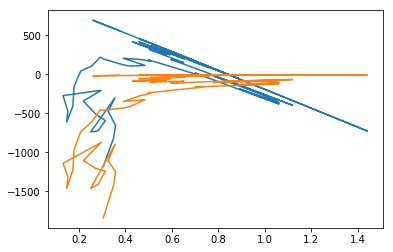

In [104]:
plt.plot(x, residuals)
plt.plot(x, residuals_log)